In [1]:
import sys
sys.path.append('pyFiles')
from Multi2Agent import CustomEnvironment
import networkx as nx
import pprint
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
def q_val(env,state,action,s_values):
    env.reset()
    env.state = state
    reward = 0
    observations, rewards, terminations, truncations, infos = env.step(action)
    s_val_index = state_index_calculator(env,observations)
    for agent in env.possible_police:
        reward += rewards[agent]
    return reward + 0.8*s_values[s_val_index]

In [3]:
def s_val(env,state,s_values):
    for thief in env.possible_thieves:
        for police in env.possible_police:
            if state[thief] == state[police]:
                return 0
    q_values = []
    for k in range(5):
        temp_state = state.copy()
        action = {env.possible_agents[0]:0,env.possible_agents[1]:k}
        q_values.append(q_val(env,temp_state,action,s_values))
    return max(q_values),q_values

def max_act(env,state,s_values):
    q_values = [] 
    actions = []
    for k in range(5):
        temp_state = state.copy()
        action = {env.possible_agents[0]:0,env.possible_agents[1]:k}
        q_values.append(q_val(env,temp_state,action,s_values))
        actions.append(action)
    max_val = max(q_values)
    max_val_index = q_values.index(max_val)
    env.state = state
    return actions[max_val_index]

def state_index_calculator(env,state):
    """ every possible state maps to an index. this function maps state to its index
    """
    multiplier = 1
    state_index = 0
    for agent in env.possible_agents:
        state_index += env.node_inv_dict[state[agent]]* multiplier
        multiplier *= env.g_no_node
    return state_index

def state_calculator(env,state_index):
    """ every possible state maps to an index. this function maps index to state
    """
    temp_state = {}
    no_of_agents = len(list(env.possible_agents))
    for n in range (no_of_agents):
        temp_state[env.possible_agents[no_of_agents-1-n]] = env.node_dict[(state_index // (env.g_no_node**(no_of_agents-1-n)))]
        state_index = state_index % (env.g_no_node**(no_of_agents-1-n))
    return temp_state

In [4]:
# testing of state and state index calculator

env = CustomEnvironment()
b = env.reset()
a = state_calculator(env,86)
print(a)
print(state_index_calculator(env,a))


{'police_0': '(0.44811437238452245, 0.9045289990489157)', 'thief_0': '(0.6171489120032924, 0.23498045883754137)'}
86


In [5]:
def single_sweep(env,s_values):
    no_of_agents = len(list(env.possible_agents))
    temp_value_func = [0] * env.g_no_node ** no_of_agents
    for i in range(env.g_no_node**no_of_agents):
        state= state_calculator(env,i)
        temp_value_func[i] = s_val(env,state,s_values)
    return temp_value_func

In [1]:
s = [] * 100


740.0
514.4000000000019
192.80000000000007
61.536000000000016
8.064
0.0
0.0
0.0
0.0
0.0


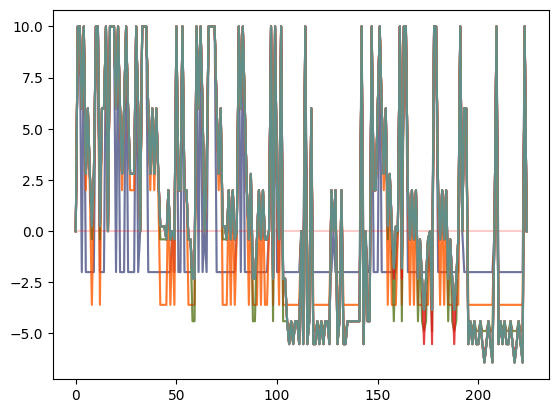

In [6]:
state = env.reset()
no_of_agents = len(list(env.possible_agents))
s_values = [0] * env.g_no_node ** no_of_agents
q_values = [] * env.g_no_node ** no_of_agents 
# delta = 14500
# diff = 100000
count = 10
# while (diff > delta):
for i in range(count):
    state = env.reset()
    temp_value_func = [v for v in s_values]
    s_values,qvalues = single_sweep(env,s_values)
    temp_diff = 0;
    for index in range(len(s_values)):
        temp_diff += abs(temp_value_func[index]-s_values[index])
    diff = temp_diff
    
    plt.plot(range(env.g_no_node**2),s_values,alpha = 0.8)
    plt.plot(range(env.g_no_node**2),temp_value_func,color = 'r',alpha = 0.2)
    # plt.plot(range(env.g_no_node**2),s_values)
    name = 'images/training/{i}.png'
    plt.savefig(name)
    # plt.show()

    print(temp_diff)
    
s_values2 = [0] * env.g_no_node ** no_of_agents

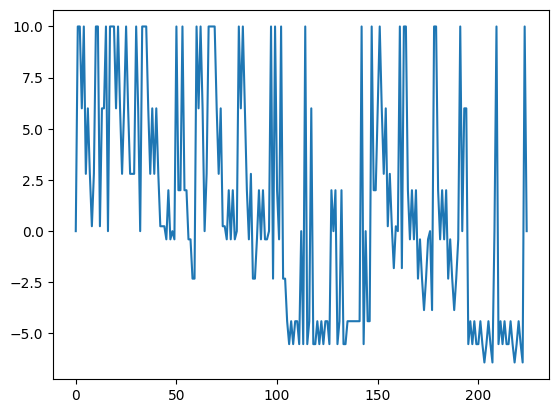

In [7]:
plt.plot(range(env.g_no_node**2),s_values)
plt.show()

<Axes: >

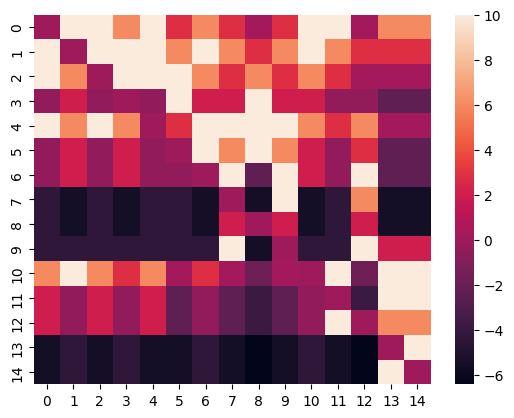

In [8]:
import seaborn as sns
import numpy as np
no_of_nodes = env.g_no_node
x = np.zeros((no_of_nodes**1,no_of_nodes**1))

for n in range(len(s_values)):
    i = n // no_of_nodes**1
    j = n % no_of_nodes**1
    x[i,j] = s_values[n]

# sns.set(rc={'figure.figsize':(13,10)})
sns.heatmap(x)

0


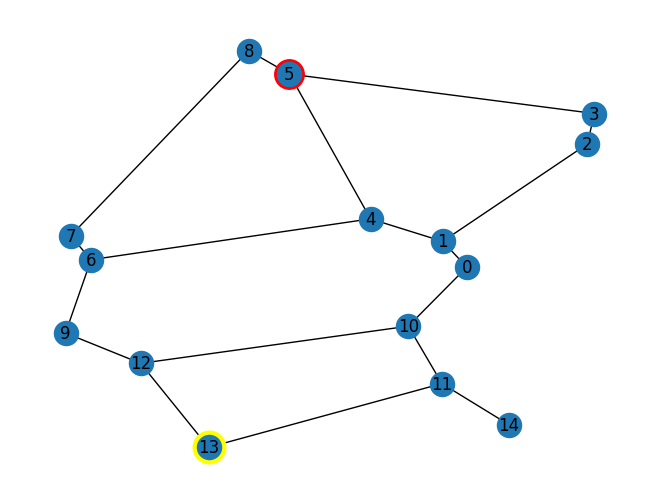

1


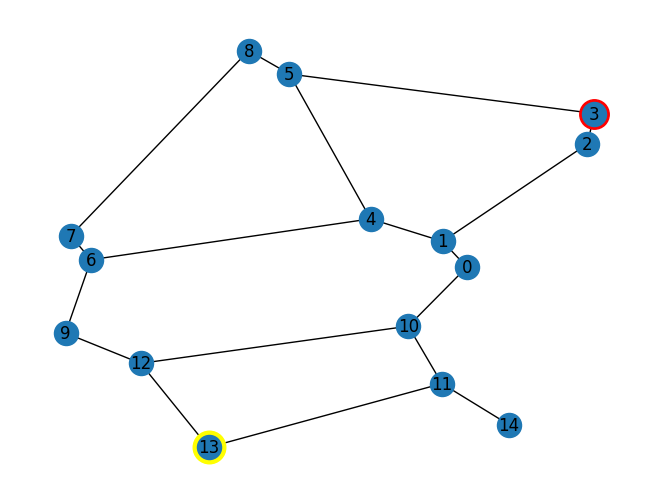

{'thief_0': False, 'police_0': False}
1


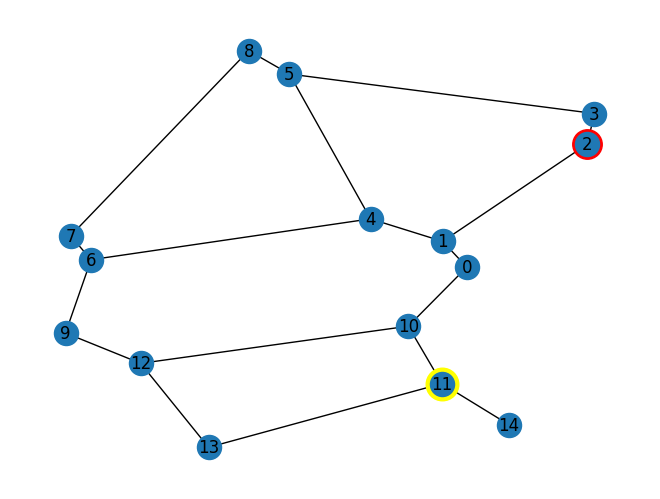

{'thief_0': False, 'police_0': False}
1


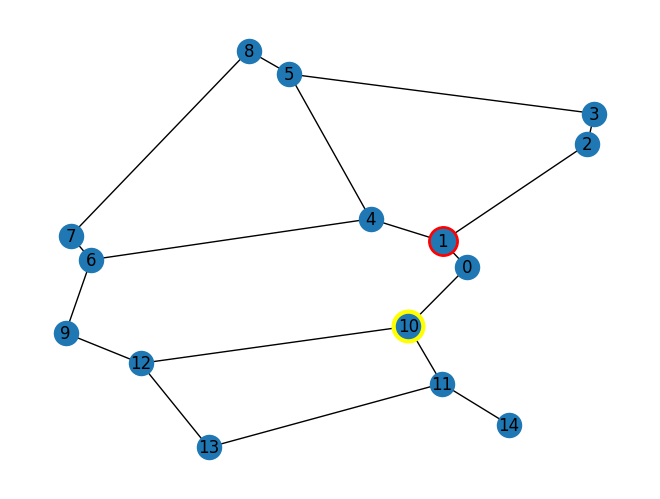

{'thief_0': False, 'police_0': False}
1


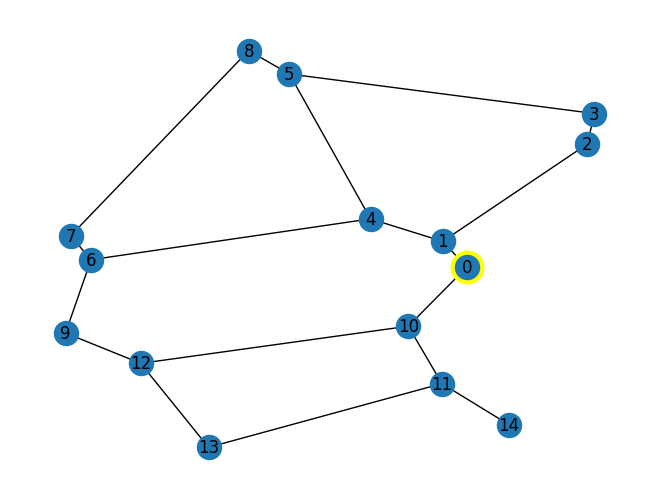

{'thief_0': True, 'police_0': False}
terminating episode = 3
Episode: 1 Score: {'thief_0': -18, 'police_0': -4} 



In [9]:

episodes = 1    
for episode in range(1,episodes+1):
    state = env.reset()
    terminations = {agent:False for agent in env.possible_agents}
    score = {a:0 for a in env.possible_agents}
    count = 0
    print(env.steps)
    env.temp_render(episode)
    terminated = False
    while not terminated:
        action = max_act(env,state,s_values)
        
        # print(observations)
        # print(env.state)
        # print(env.node_inv_dict[state['police_0']])
        # print(env.node_inv_dict[state['thief_0']])
        print(env.steps)
        observations, rewards, terminations, truncations, infos = env.step(action)
        state = env.state
        # print(observations)
        # print(env.state)
        # print(env.node_inv_dict[state['police_0']])
        # print(env.node_inv_dict[state['thief_0']])
        # print([i for i in env.g_env.neighbors(state['police_0'])])
        # print([i for i in env.g_env.neighbors(state['thief_0'])])
        # print(rewards['police_0'])
        # print(rewards['thief_0'])
        # print(' index acc to state is ',state_index_calculator(env,env.state))
        
        env.temp_render(count)
        print(terminations)
        if (terminations['thief_0'] == True):
            print('terminating episode = {}'.format(count))
            terminated = True
        for agent in env.agents:
            score[agent] += rewards[agent]
        count += 1
    print('Episode: {} Score: {} \n'.format(episode,score))